# Causal Networks (Regression)

Taken from [http://openonlinecourses.com/causalanalysis/CausalNetworksLASSORegression.asp](http://openonlinecourses.com/causalanalysis/CausalNetworksLASSORegression.asp).

## Question 1

- $H \sim \mathrm{DME}^* + \mathrm{CL}^* + P^*$
- $\mathrm{LTH} \sim H^* + P^* + \mathrm{DME} + \mathrm{CL}$
- $\mathrm{RF} \sim H^* + P^* + \mathrm{DME} + \mathrm{CL}$
- $\mathrm{SNF} \sim H^* + P^* + \mathrm{DME} + \mathrm{CL}$
- $\mathrm{HHA} \sim P^* + H + \mathrm{DME} + \mathrm{CL}$
- $\mathrm{HOS} \sim H^* + \mathrm{LTH}^* + \mathrm{DME} + \mathrm{CL} + \mathrm{P} + \mathrm{PBD} + \mathrm{RF} + \mathrm{SNF} + \mathrm{HHA}$
- $\mathrm{HO} \sim \mathrm{LTH}^* + \mathrm{PBD}^* + \mathrm{DME} + \mathrm{CL} + \mathrm{P} + H + \mathrm{RF} + \mathrm{SNF} + \mathrm{HHA}$
- $\mathrm{OT} \sim \mathrm{LTH}^* + \mathrm{PBD}^* + \mathrm{RF}^* + \mathrm{SNF}^* + \mathrm{HHA}^* + \mathrm{DME} + \mathrm{CL} + \mathrm{P} + H$
- $\mathrm{BP} \sim H^* + \mathrm{HOS}^* + \mathrm{HO}^* + \mathrm{PBD}^* + \mathrm{OT}^* + \mathrm{SNF}^* + \mathrm{HHA}^* + \mathrm{DME} + \mathrm{CL} + \mathrm{P} + \mathrm{RF} + \mathrm{LTH}$

## Question 2

### Import the data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./STARD.csv')
df.shape

(3679, 48)

In [2]:
df.head()

,id,concat,Gender,weeks,CIT,Bupropion,Mirzapine,Buspirone,Lithium,Nortriptyline,...,Anxiety,Borderline_Personality,Dependent_Personality,Antisocial_Personality,Paranoid_Personality,Personality_Disorder,Anorexia,Bulimia,Cocaine,Citalopram
0,1233,MED1000000000,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1236,MED1000000000,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1256,MED1000000000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1259,MED1000000000,0.0,5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1262,MED1000000000,0.0,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Check missingness

<AxesSubplot:title={'center':'Missingness'}>

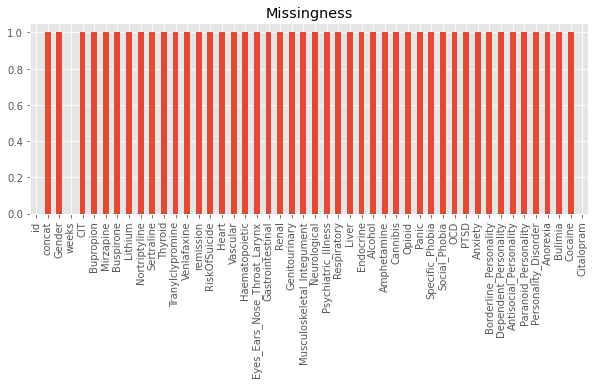

In [10]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

s = df.isna().sum()
s.plot(kind='bar', title='Missingness', figsize=(10, 3.5))

### Drop records with missing data

This is just one record.

In [13]:
df = df.dropna()
df.shape

(3678, 48)

### Check the domains of each variable

Are they all binary? Cocaine is not binary, so we'll transform that variable to be binary.

In [20]:
e_cols = ['remission', 'Citalopram', 'concat', 'id', 'weeks']
i_cols = [c for c in df.columns if c not in e_cols]

pd.DataFrame([(c, len(df[c].value_counts())) 
              for c in i_cols + ['remission', 'Citalopram']], columns=['variable', 'n_values']) \
    .sort_values(['n_values'], ascending=False)

,variable,n_values
42,Cocaine,3
0,Gender,2
33,PTSD,2
25,Alcohol,2
26,Amphetamine,2
27,Cannibis,2
28,Opioid,2
29,Panic,2
30,Specific_Phobia,2
31,Social_Phobia,2


In [23]:
df['Cocaine'].value_counts().sort_index()

0.0    3641
1.0      16
2.0      21
Name: Cocaine, dtype: int64

In [25]:
df = df \
    .assign(Cocaine=lambda d: d['Cocaine'].apply(lambda v: 0 if v == 0 else 1))
df.shape

(3678, 48)

## Learn the parents

In [26]:
e_cols = ['remission', 'Citalopram', 'concat', 'id', 'weeks']
i_cols = [c for c in df.columns if c not in e_cols]

len(e_cols), len(i_cols)

(5, 43)

Model for remission. Notice the regularization is set to `C=0.05`?

In [62]:
from sklearn.linear_model import LogisticRegression

X, y = df[i_cols], df['remission'].ravel()

m1 = LogisticRegression(penalty='l1', C=0.03, solver='saga', random_state=37)
m1.fit(X, y)

c1 = pd.Series(m1.coef_[0], X.columns)

Model for Citalopram.

In [63]:
X, y = df[i_cols], df['Citalopram'].ravel()

m2 = LogisticRegression(penalty='l1', C=0.2, solver='saga', random_state=37)
m2.fit(X, y)

c2 = pd.Series(m2.coef_[0], X.columns)

Side by side view of coefficients.

In [64]:
pd.DataFrame([c1, c2], index=['remission', 'Citalopram']).T \
    .query('abs(remission) > 0 or abs(Citalopram) > 0')

,remission,Citalopram
CIT,0.175928,8.734231
Bupropion,0.000000,-7.679186
Mirzapine,0.000000,-4.359558
Buspirone,0.000000,-7.848646
Lithium,0.000000,-3.660468
Thyroid,0.000000,-4.527627
Gastrointestinal,0.000000,-0.089738
Musculoskeletal_Integument,-0.009958,0.000000
Neurological,-0.067495,0.000000
Respiratory,-0.012714,0.000000


These are the variables important to remission.

In [65]:
c1[np.abs(c1) > 0]

CIT                           0.175928
Musculoskeletal_Integument   -0.009958
Neurological                 -0.067495
Respiratory                  -0.012714
dtype: float64

These are the variables import to Citalopram.

In [66]:
c2[np.abs(c2) > 0]

CIT                 8.734231
Bupropion          -7.679186
Mirzapine          -4.359558
Buspirone          -7.848646
Lithium            -3.660468
Thyroid            -4.527627
Gastrointestinal   -0.089738
dtype: float64

Learn the parameters for remission.

In [91]:
import itertools

s = c1[np.abs(c1) > 0]
values = [(0, 1) for _ in range(len(s))]
values = list(itertools.product(*values))
values = pd.DataFrame(values, columns=s.index)

X, y = df[s.index], df['remission'].ravel()
m = LogisticRegression(random_state=37, solver='saga')
m.fit(X, y)

remission_cpt = list(m.predict_proba(values).ravel())

Learn the parameters for Citalopram.

In [92]:
s = c2[np.abs(c2) > 0]
values = [(0, 1) for _ in range(len(s))]
values = list(itertools.product(*values))
values = pd.DataFrame(values, columns=s.index)

X, y = df[s.index], df['Citalopram'].ravel()
m = LogisticRegression(random_state=37, solver='saga')
m.fit(X, y)

citalopram_cpt = list(m.predict_proba(values).ravel())

Learn the parameters for the parents.

In [102]:
def get_prob(c):
    s = df[c].value_counts().sort_index()
    s = s / s.sum()
    p0 = s.iloc[0]
    p1 = s.iloc[1]
    
    return [p0, p1]

cpts = list(set(list(c1[np.abs(c1) > 0].index) + list(c2[np.abs(c2) > 0].index)))
cpts = {c: get_prob(c) for c in cpts}
cpts['remission'] = remission_cpt
cpts['Citalopram'] = citalopram_cpt

Define the structure.

In [110]:
nodes = ['remission', 'Citalopram'] + \
            list(set(list(c1[np.abs(c1) > 0].index) + list(c2[np.abs(c2) > 0].index)))
edges = [(c, 'remission') for c in c1[np.abs(c1) > 0].index] + \
            [(c, 'Citalopram') for c in c2[np.abs(c2) > 0].index]

Now that we have structure and parameters, we can build the BBN.

In [122]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController
from pybbn.generator.bbngenerator import convert_for_drawing

bbn = Bbn()

bbn_nodes = {c: BbnNode(Variable(i, c, ['no', 'yes']), cpts[c]) for i, c in enumerate(nodes)}
for c in bbn_nodes:
    bbn.add_node(bbn_nodes[c])
    
for pa, ch in edges:
    pa_node = bbn_nodes[pa]
    ch_node = bbn_nodes[ch]
    
    bbn.add_edge(Edge(pa_node, ch_node, EdgeType.DIRECTED))

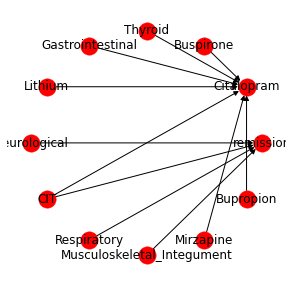

In [123]:
import networkx as nx

g = convert_for_drawing(bbn)

fig, ax = plt.subplots(figsize=(5, 5))

nx.draw(**{
    'G': g,
    'ax': ax,
    'pos': nx.circular_layout(g),
    'with_labels': True,
    'labels': {node.variable.id: name for name, node in bbn_nodes.items()},
    'node_color': 'r'
})

Perform inference.

In [126]:
from pybbn.graph.jointree import EvidenceBuilder

join_tree = InferenceController.apply(bbn)

ev1 = EvidenceBuilder() \
        .with_node(join_tree.get_bbn_node_by_name('CIT')) \
        .with_evidence('yes', 1.0) \
        .build()
evidences = [ev1]

join_tree.update_evidences(evidences);

for node, posteriors in join_tree.get_posteriors().items():
    p = ', '.join([f'{val}={prob:.5f}' for val, prob in posteriors.items()])
    print(f'{node} : {p}')

Respiratory : no=0.66504, yes=0.33496
Musculoskeletal_Integument : no=0.54432, yes=0.45568
Neurological : no=0.71887, yes=0.28113
CIT : no=0.00000, yes=1.00000
remission : no=0.67024, yes=0.32976
Buspirone : no=0.94454, yes=0.05546
Thyroid : no=0.99103, yes=0.00897
Gastrointestinal : no=0.61446, yes=0.38554
Lithium : no=0.98967, yes=0.01033
Mirzapine : no=0.95949, yes=0.04051
Bupropion : no=0.89967, yes=0.10033
Citalopram : no=0.98211, yes=0.01789
